# Eliminación de nodos en Árboles AVL

La eliminación de nodos en árboles AVL es una operación crítica que requiere mantener el balance del árbol tras la eliminación para asegurar que las operaciones subsiguientes de búsqueda, inserción y eliminación se mantengan en O(log n). Este proceso implica eliminar el nodo deseado y luego realizar un rebalanceo del árbol mediante rotaciones si es necesario.

- **Concepto de Eliminación en Árboles AVL:**
  - Eliminar el nodo como en un árbol binario de búsqueda.
  - Recalcular la altura de cada nodo padre.
  - Aplicar rotaciones para mantener el árbol balanceado.

- **Aplicaciones de la Eliminación en Árboles AVL:**
  - Mantener estructuras de datos dinámicas eficientemente balanceadas.
  - Permitir operaciones de eliminación en bases de datos y sistemas de indexación sin degradar el rendimiento.

- **Implementación en Python:**
  - Utilizar la clase `AVLTree` existente y extenderla con un método de eliminación.

## Extensión de la clase AVLTree

Aquí te muestro cómo implementar este método en la clase [`AVLTree`](src/AVLTree.py): 

In [1]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/AVLTree.py
from src.AVLTree import AVLTree

In [2]:
# Método para eliminar un nodo del árbol AVL
def delete(self, data):
    self.root = self._delete_recursive(self.root, data)

def _delete_recursive(self, node, data):
    # Paso 1: Realizar la eliminación estándar de BST
    if not node:
        return node

    if data < node.data:
        node.left = self._delete_recursive(node.left, data)
    elif data > node.data:
        node.right = self._delete_recursive(node.right, data)
    else:
        # Nodo con solo un hijo o sin hijos
        if node.left is None:
            temp = node.right
            node = None
            return temp
        elif node.right is None:
            temp = node.left
            node = None
            return temp

        # Nodo con dos hijos: Obtener el sucesor inorden (el menor en el subárbol derecho)
        temp = self._get_min_value_node(node.right)
        node.data = temp.data
        node.right = self._delete_recursive(node.right, temp.data)

    # Si el árbol tenía solo un nodo, retornarlo
    if node is None:
        return node

    # Paso 2: Actualizar la altura del nodo actual
    node.height = 1 + max(self._get_height(node.left),
                            self._get_height(node.right))

    # Paso 3: Obtener el factor de equilibrio
    balance = self._get_balance(node)

    # Paso 4: Balancear el árbol
    # Caso Izquierda Izquierda
    if balance > 1 and self._get_balance(node.left) >= 0:
        return self._rotate_right(node)

    # Caso Izquierda Derecha
    if balance > 1 and self._get_balance(node.left) < 0:
        node.left = self._rotate_left(node.left)
        return self._rotate_right(node)

    # Caso Derecha Derecha
    if balance < -1 and self._get_balance(node.right) <= 0:
        return self._rotate_left(node)

    # Caso Derecha Izquierda
    if balance < -1 and self._get_balance(node.right) > 0:
        node.right = self._rotate_right(node.right)
        return self._rotate_left(node)

    return node

Nota que no he incluido la implementación de los métodos _rotate_left, _rotate_right, _get_height, _get_balance, y _get_min_value_node, ya que se asume que son similares a los utilizados en las **operaciones de inserción** y deben estar presentes en tu clase AVLTree para soportar las rotaciones necesarias para mantener el árbol balanceado. 

## Pruebas de Eliminación en Árboles AVL

Para probar la eliminación, podemos eliminar algunos nodos de un árbol AVL existente y luego verificar la estructura y balance del árbol:

Antes de eliminar


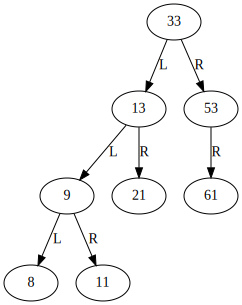

Después de eliminar


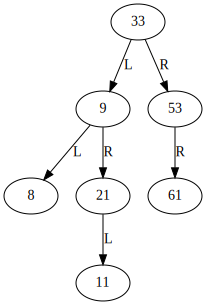

In [3]:
avl_tree = AVLTree()

# Insertar algunos nodos
for key in [33, 13, 53, 9, 21, 61, 8, 11]:
    root = avl_tree.insert(key)

# Visualizar el árbol
dot = visualize_bt(avl_tree)
print('Antes de eliminar')
display(dot)

# Eliminar un nodo y verificar la estructura del árbol
root = avl_tree.delete(13)

# Visualizar el árbol
dot = visualize_bt(avl_tree)
print('Después de eliminar')
display(dot)


## Complejidad del Algoritmo

- **Complejidad Temporal:** La eliminación tiene una complejidad temporal de O(log n) porque se deben atravesar los nodos a lo largo de la altura del árbol para encontrar el nodo a eliminar, y luego potencialmente realizar rotaciones.
- **Complejidad Espacial:** La complejidad espacial es O(log n) debido al espacio de la pila de llamadas durante la ejecución recursiva.

## Ejercicios Prácticos

1. Implementa un método en la clase `AVLTree` que permita eliminar todos los nodos con claves menores a un valor dado y muestra el resultado.
2. Modifica la clase `AVLTree` para que realice un seguimiento del número de nodos en el árbol y actualícelo durante las operaciones de inserción y eliminación. Añade un método para recuperar este conteo.